In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('data/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
label_encoder = LabelEncoder()

# Encoding 'yes' -> 1, 'no' -> 0 for categorical columns
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['basement'] = label_encoder.fit_transform(df['basement'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])
df['prefarea'] = label_encoder.fit_transform(df['prefarea'])

# Encode 'furnishingstatus' into numerical categories
df['furnishingstatus'] = label_encoder.fit_transform(df['furnishingstatus'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [4]:
X = df.drop('price',axis =1)
y = df['price']

# Linear Regression

In [5]:
best_r2 = float('-inf')
best_iteration = None
worst_r2 = float('inf')
worst_iteration = None
LR_model = LinearRegression()

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    LR_model.fit(X_train, y_train)
    y_pred = LR_model.predict(X_test)
    
    r2 = metrics.r2_score(y_test, y_pred)

    if r2 > best_r2:
        best_r2 = r2
        best_iteration = i
    
    if r2 < worst_r2:
        worst_r2 = r2
        worst_iteration = i

print(f"Best iteration: {best_iteration}, Best R2 score: {best_r2:.4f}")
print(f"Worst iteration: {worst_iteration}, Worst R2 score: {worst_r2:.4f}")

Best iteration: 73, Best R2 score: 0.7634
Worst iteration: 82, Worst R2 score: 0.4956


Best iteration (73): The model performed the best with an R² score of 0.7634

Worst iteration (82): The model performed the worst with an R² score of 0.4956

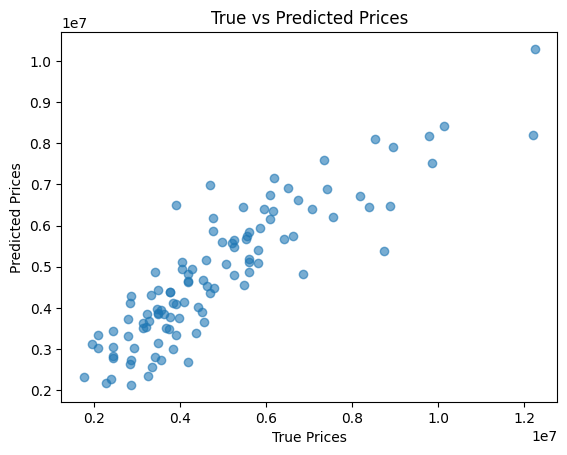

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)
# Visualize Results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs Predicted Prices")
plt.show()

<Axes: xlabel='price', ylabel='Count'>

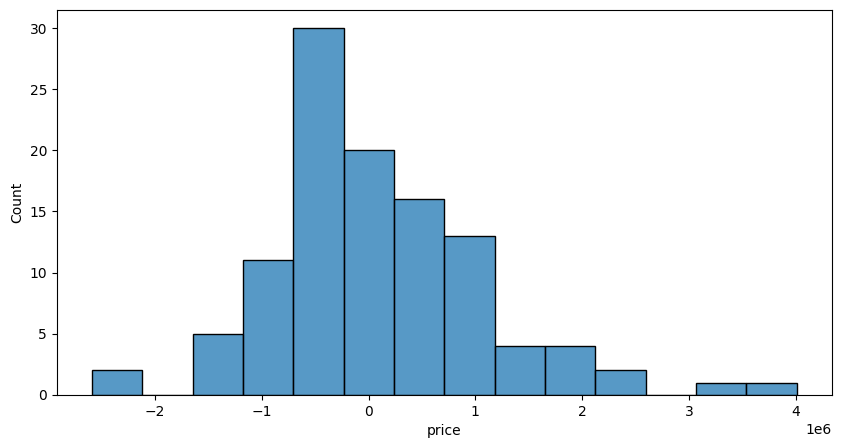

In [7]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.histplot(residuals)

In [8]:
def evaluate_model_performance(y_test, y_pred):
    """
    Evaluates and prints the performance metrics of a model.

    Parameters:
    - y_test: array-like, Ground truth target values.
    - y_pred: array-like, Predicted target values by the model.

    Returns:
    None
    """
    print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R² Score: {metrics.r2_score(y_test, y_pred):.2f}")
    print(f"VarScore: {metrics.explained_variance_score(y_test, y_pred):.4f}")

In [9]:
# Initialize models
random_forest = RandomForestRegressor()
xgboost = XGBRegressor()
gradient_boosting = GradientBoostingRegressor()

Finding the best and worst random_state for Random Forest, XGBoost, Gradient Boosting.

In [10]:
# Fit and evaluate models
models = {'Random Forest': random_forest, 'XGBoost': xgboost, 'Gradient Boosting': gradient_boosting}

# Initialize a dictionary to store the best R2 score and corresponding iteration for each model
best_r2_scores = {name: {"best_r2": float('-inf'), "iteration": None} for name in models.keys()}
worst_r2_scores = {name: {"worst_r2": float('inf'), "iteration": None} for name in models.keys()}

# Perform 100 iterations of training and testing
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate R2 score
        current_r2 = metrics.r2_score(y_test, y_pred)

        # Update the best R2 score and iteration for the model
        if current_r2 > best_r2_scores[name]["best_r2"]:
            best_r2_scores[name]["best_r2"] = current_r2
            best_r2_scores[name]["iteration"] = i

        if current_r2 < worst_r2_scores[name]["worst_r2"]:
            worst_r2_scores[name]["worst_r2"] = current_r2
            worst_r2_scores[name]["iteration"] = i


# Print the best and worst R2 score and corresponding iteration for each model
for name, data in best_r2_scores.items():
    print(f"Best R2 Score for {name}: {data['best_r2']:.4f} (Iteration: {data['iteration']})")
for name, data in worst_r2_scores.items():
    print(f"Worst R2 Score for {name}: {data['worst_r2']:.4f} (Iteration: {data['iteration']})")

Best R2 Score for Random Forest: 0.7447 (Iteration: 50)
Best R2 Score for XGBoost: 0.7311 (Iteration: 72)
Best R2 Score for Gradient Boosting: 0.7822 (Iteration: 79)
Worst R2 Score for Random Forest: 0.4039 (Iteration: 89)
Worst R2 Score for XGBoost: 0.2910 (Iteration: 78)
Worst R2 Score for Gradient Boosting: 0.4411 (Iteration: 82)


In [11]:
random_forest = RandomForestRegressor(random_state=71)
xgboost = XGBRegressor(random_state = 72)
gradient_boosting = GradientBoostingRegressor(random_state=79)

In [12]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

# Fit the Random Forest model
model = RandomForestRegressor(random_state=44)
model.fit(X_train, y_train)

# Feature importances
feature_importances = model.feature_importances_

# Create DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


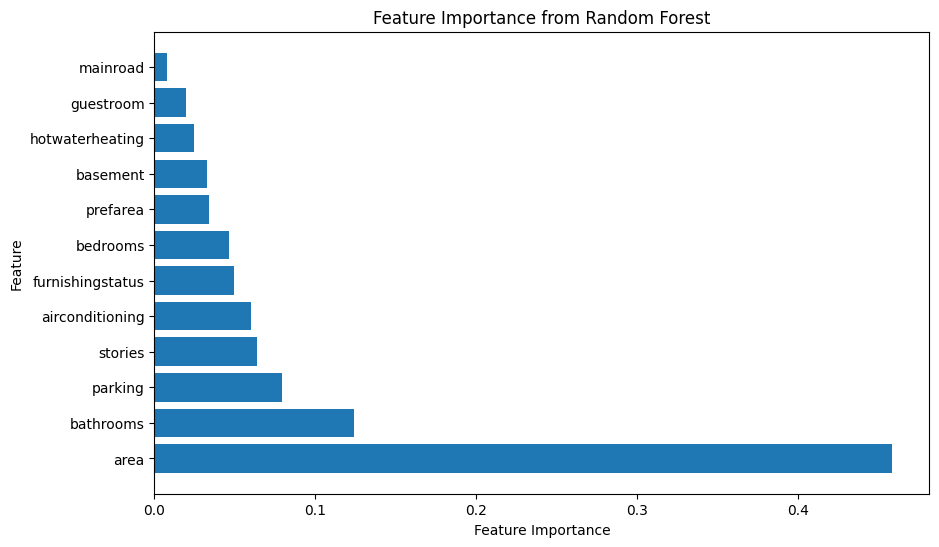

In [13]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

In [14]:
# Select features that are more important (based on a threshold, for example > 0.01
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]

# Filter the dataset to keep only important features
X_train_important = X_train[important_features['Feature']]
X_test_important = X_test[important_features['Feature']]

# Check the updated feature list
print(X_train_important.columns)

Index(['area', 'bathrooms', 'parking', 'stories', 'airconditioning',
       'furnishingstatus', 'bedrooms', 'prefarea', 'basement',
       'hotwaterheating', 'guestroom'],
      dtype='object')


In [15]:
for name, model in models.items():
    model.fit(X_train_important, y_train)
    y_pred = model.predict(X_test_important)

    print(f"\n{name} Performance:")
    evaluate_model_performance(y_test, y_pred)


Random Forest Performance:
MAE: 719430.47
MSE: 915786013657.15
RMSE: 956967.09
R² Score: 0.71
VarScore: 0.7058

XGBoost Performance:
MAE: 814226.12
MSE: 1208137416704.00
RMSE: 1099153.05
R² Score: 0.61
VarScore: 0.6118

Gradient Boosting Performance:
MAE: 781141.25
MSE: 1152179366885.64
RMSE: 1073396.18
R² Score: 0.63
VarScore: 0.6296


Taking only the important features didn't work as planned. Despite selecting what were deemed to be the key features, the model's performance did not improve as anticipated. it even got worse

# Outliers
Lets try to remove the outliers

In [16]:
low_P,high_P = df['price'].quantile([0.05,0.95])
low_A,high_A = df['area'].quantile([0.05,0.95])

In [17]:
dataset_without_outliers = df[df['price'].between(low_P,high_P) & df['area'].between(low_A,high_A)]

In [18]:
dataset_without_outliers.shape

(450, 13)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Initialize a dictionary to store the best R² score and corresponding iteration for each model
best_r2_scores = {name: {"best_r2": float('-inf'), "iteration": None} for name in models.keys()}

X = dataset_without_outliers.drop('price', axis=1)
y = dataset_without_outliers['price']

# Perform 100 iterations of training and testing
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate R² score
        current_r2 = r2_score(y_test, y_pred)

        # Update the best R² score and iteration for the model
        if current_r2 > best_r2_scores[name]["best_r2"]:
            best_r2_scores[name]["best_r2"] = current_r2
            best_r2_scores[name]["iteration"] = i

# Print the best R² score and corresponding iteration for each model
for name, data in best_r2_scores.items():
    print(f"Best R² Score for {name}: {data['best_r2']:.4f} (Iteration: {data['iteration']})")


Best R² Score for Random Forest: 0.7529 (Iteration: 29)
Best R² Score for XGBoost: 0.6902 (Iteration: 56)
Best R² Score for Gradient Boosting: 0.7457 (Iteration: 60)


Removing the outliers didn't do much

# Random Forest

In [20]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Hyper tuning the model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=44),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

y_pred = best_rf_model.predict(X_test)

evaluate_model_performance(y_test, y_pred)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Hyperparameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
MAE: 656419.27
MSE: 735899250937.28
RMSE: 857845.70
R² Score: 0.67
VarScore: 0.6784


# Gradient Boosting

In [21]:
# Hyper tuning the model
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=44),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=50,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


best_gb_model = random_search.best_estimator_
print("Best Hyperparameters for Gradient Boosting:", random_search.best_params_)

y_pred = best_gb_model.predict(X_test)
evaluate_model_performance(y_test, y_pred)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters for Gradient Boosting: {'subsample': 0.6, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.01}
MAE: 659246.70
MSE: 736428095724.40
RMSE: 858153.89
R² Score: 0.67
VarScore: 0.6784


## Keras model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [23]:
model = Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mean_squared_error')

Epoch 1/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 22563778461696.0000 - val_loss: 25121192411136.0000
Epoch 2/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 22580444528640.0000 - val_loss: 25120217235456.0000
Epoch 3/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 23593979215872.0000 - val_loss: 25119174950912.0000
Epoch 4/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 22968275042304.0000 - val_loss: 25118069751808.0000
Epoch 5/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 22537199157248.0000 - val_loss: 25116882763776.0000
Epoch 6/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 23314856673280.0000 - val_loss: 25115607695360.0000
Epoch 7/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 22565064015872.0000 - val_loss: 25114236157952.0000
Epoch 8/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 23094221602816.0000 - val_loss: 25112749277184.0000
Epoch 9/400
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 22932722024448.0000 - val_loss: 25111142858752.0000
Epoch 10/4

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,913 (7.48 KB)

 Trainable params: 637 (2.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,276 (4.99 KB)

<Axes: >

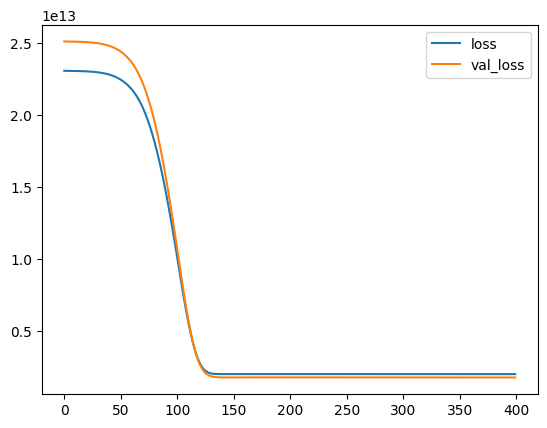

In [24]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
model.summary()
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [25]:
y_pred = model.predict(X_test)
evaluate_model_performance(y_test, y_pred)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 995426.31
MSE: 1754505150464.00
RMSE: 1324577.35
R² Score: 0.22
VarScore: 0.2619


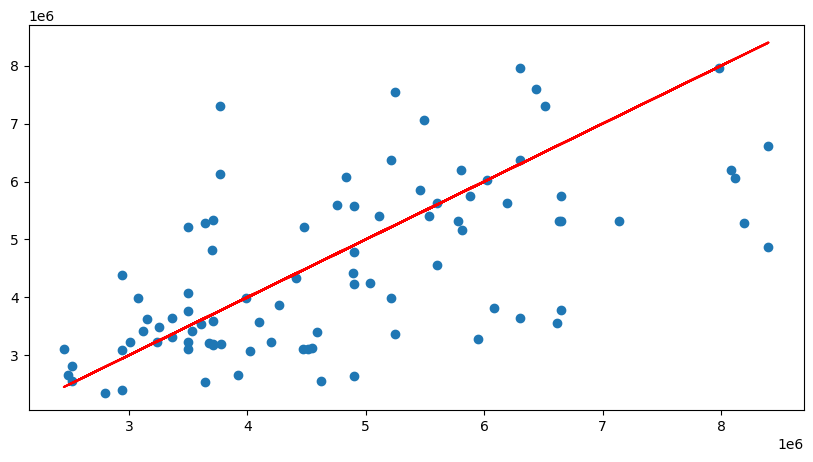

In [26]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

Ultimately, the best-performing model was Gradient Boosting, with a score of 0.7808 and a random_state of 79. Linear regression ranked as the second-best model, although it demonstrated a more consistent performance across runs. I found that varying the random_state had a significant impact on the performance of the models, underscoring the importance of initialization when training certain algorithms. The worst-performing model was the neural network built with Keras, but this was expected given the relatively small dataset size.